# I. Introduction
***
Traditionally, we often think about fullbacks, the left and right defenders, as players whose main roles are to prevent opponents from scoring and stay back while their teammates are attacking. In modern football, their duties are much more than that. Not only defending well, but they must also participate in attacking. Hence comes the name **wingbacks**, meaning that they often press so high that they can be seen as a mixture of a fullback and a winger. In some teams, we even see that wingbacks focus more on attacking, while the gaps behind are usually covered by central midfielders. 

The idea of wingbacks has been implemented quite a time ago, but until recently, we see the abundance of excellent wingbacks grown. This is due to the rise of many innovative managers, typically Pep Guardiola, who is famous for his **"tiki-taka"** and Jurgen Klopp, with his **"heavy metal football"**.

<figure>
<img src="https://derivates.kicker.de/image/fetch/f_webp,w_800,h_600,c_fill,g_auto,q_auto:best/http%3A%2F%2Fmediadb.kicker.de%2Fnews%2F1000%2F1020%2F1100%2F8000%2F8201%2Fartikel02%2F1023186%2Fklopp-1525514203.jpg" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Jurgen Klopp and Pep Guardiola. Source: kicker.de</b></figcaption>
</figure>
<br/>

Because of the special playstyle, wingbacks are required to have a very strong physical endurance and fast speed, as well as skills from a midfielder like passing and scoring. To evaluate the performance of a wingback, we have to assess not only defending abilities like `tackling`, `interceptions`, `clearances` ..., but also attacking perspectives like `key passes`, `goals`, `assists` etc.  

<figure>
<img src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/default/0001/97/thumb_96635_default_news_size_5.jpeg" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Trent Alexander-Arnold and Andy Robertson, outstanding wingbacks couple from Liverpool. Photo: Liverpool FC via Getty</b></figcaption>
</figure>
<br/>

In this project I will focus on attacking aspects of a wingback and evaluate how well he takes part in bulding up his team's play, in terms of a stat called `xGChain`. The notion was introduced by `statsbomb` at https://statsbomb.com/2018/08/introducing-xgchain-and-xgbuildup/.
Basically, it measures the involvement of a player in attacking by assigning to him a number, which is deduced from the expected goal of all possessions he joins (only possesions which lead to a shot are counted). 

The reason behind this choice is quite simple. We cannot expect a wingback to score or assist as effectively as other positions like strikers or midfielders. What we measure him in attacking can only be seen by his contribution to dangerous situations that his team creates. This reflects how well he cooperates with his teammates, from which it leads to a shot. In some cases, he can even be the one who score a goal. Also by this reason, I decide to choose `xGChain` instead of `xGBuildup`.

I will scrape data from https://understat.com/ and make an analysis on the trend of wingbacks in football teams in top 5 leagues in Europe. At the end, I also highlight some of the best players.

### Acknowledgement:
***

This project is inspired by [Edd Webster](https://github.com/eddwebster), [Sergi Lehkyi](https://towardsdatascience.com/web-scraping-advanced-football-statistics-11cace1d863a) and [Khuyen Tran](https://github.com/khuyentran1401).



# II. Scraping and cleanse data
***

## 1. Import involved libraries
***

In [2]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import plotly.express as px

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
%matplotlib inline


## 2. Examine the site
***

https://understat.com/ is structured as follows:

- There are total 6 leagues
- Stats are collected from season 2014/2015
- The data at each season is given under the link of the form https://understat.com/league/EPL/2020 (for season 2020/2021 England Premier League)
- Inspecting the page shows that data is stored in tabs called `script`
![understat.png](understat.png)
- There are 3 important types of data here:

    - `teamsData`: extracting JSON data gives us a list, keys are `id`s of each team and values are again lists with 3 keys: `id`, `title`, and `history`.
    - `playersData`: results in a list, containing information of all players in season 2020, Premier League. Basically, an element of this list is a dictionary consisting of all stats of a player in the whole season.
    - `datesData`: this will give a list that stores info on all matches of a season. So, each element of this list is a dictionary, corresponding to a specific match. There is a key called `isResult`, if its value is `True` then this match already happened. We are only interested in the `id` of each match and use `playersData` for collecting the `id`'s of all matches.
    
Since my purpose is to gather info on players who played at the wingback positions, I expect to see it is stored in `playersData`. However, for some reasons, https://understat.com/ doesn't show info I need, such as the exact position for each player. Therefore, I decide to scrape through all matches. Despite time consuming, it is totally worth since I have accurate and detailed stats for all players. 

- Each match under the link, e.g https://understat.com/match/14795 has two types of data:
    - `shotsData`: lists all situations happened in this match. 
    - `rostersData`: gives us a dictionary with two keys: `h` stands for the home team and `a` for the away team. The values corresponding to the key `h`, for example, have all information of each players in the home team, including `position`, `shots`, `xG` ... And that is exactly what I need!

## 3. Scrape and cleanse data
***
### Scrape data

The basic idea is: 
- Looping through all leagues, 
    - For each league we loop again through all seasons from 2014/2015. Inside each season:

        - Make a ranking table for all teams, filtering down to top 5, based on points
        - Collect all match id's
        - Make another loop over all matches:
            - Pick stats of all players playing in one of 4 positions: `DL`, `DR`, `DML`, `DMR`
            - Append stat of each player into a temporary list
            - Make a dataframe based on this list
- concatenating all dataframes for each season and finally for each league into one
    

The code to get the dataframe for all wingbacks in top 5 teams each league and each season can be found [here](./scrape_data.py).

### Check data

In [3]:
data=pd.read_csv('wingbacks_topteams.csv')

# rename 2 unnamed columns
data.rename(columns={'Unnamed: 0':'league','Unnamed: 1': 'season'},inplace= True) 
data.drop('Unnamed: 2',1,inplace=True)
data.head(10)

,league,season,player,team_id,position,goals,assists,key_passes,xG,xA,time,shots,player_id,xGChain,xGBuildup
0,EPL,2014,Kyle Naughton,82,DR,0,0,0,0.000000,0.000000,28,0,718,0.000000,0.000000
1,EPL,2014,Danny Rose,82,DL,0,0,0,0.000000,0.000000,90,0,641,0.633840,0.633840
2,EPL,2014,Mathieu Debuchy,83,DR,0,0,0,0.491409,0.000000,90,1,967,0.047335,0.047335
3,EPL,2014,Kieran Gibbs,83,DL,0,0,0,0.000000,0.000000,55,0,545,0.000000,0.000000
4,EPL,2014,Gaël Clichy,88,DR,0,0,0,0.000000,0.000000,90,0,613,0.139317,0.139317
5,EPL,2014,Aleksandar Kolarov,88,DL,0,0,1,0.000000,0.022982,90,0,621,0.243947,0.243947
6,EPL,2014,Branislav Ivanovic,80,DR,1,0,1,0.664557,0.045407,90,2,682,0.694836,0.649429
7,EPL,2014,César Azpilicueta,80,DL,0,0,0,0.000000,0.000000,90,0,681,0.694836,0.694836
8,EPL,2014,Branislav Ivanovic,80,DR,0,0,2,0.087332,0.363807,90,3,682,0.542235,0.127386
9,EPL,2014,César Azpilicueta,80,DL,0,0,1,0.000000,0.034810,90,0,681,0.248595,0.248595


# III. Some visualizations and analysis
***


The leagues considered are top 5 leagues in Europe and seasons are from 2014/2015 to 2021/2022

In [4]:
leagues=['EPL','La_liga','Bundesliga','Serie_A','Ligue_1']  
seasons=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

For each league and each season, we take the sum of stats of all wingbacks

In [5]:
# Data is grouped by `league` and `season`, then taking the sum of stats 
sum_df = data.groupby(['league','season']).sum().reset_index()
sum_df.drop(['player_id','team_id'],axis = 1, inplace = True)

# Round the decimal to 2 digits
sum_df.round(2)

,league,season,goals,assists,key_passes,xG,xA,time,shots,xGChain,xGBuildup
0,Bundesliga,2014,19,27,304,17.38,29.57,28027,199,101.49,78.27
1,Bundesliga,2015,11,23,280,11.86,27.68,24675,173,121.39,97.04
2,Bundesliga,2016,16,23,253,12.52,27.87,21018,173,99.51,78.57
3,Bundesliga,2017,11,36,285,12.11,30.60,21091,188,116.25,94.87
4,Bundesliga,2018,22,43,322,19.70,46.11,27738,215,154.31,119.19
5,Bundesliga,2019,33,36,323,28.77,41.97,27164,242,174.07,135.86
6,Bundesliga,2020,19,44,318,18.94,40.15,24398,236,137.98,101.81
7,Bundesliga,2021,9,26,199,10.98,23.16,14127,127,69.42,49.52
8,EPL,2014,15,32,294,15.40,30.34,31080,199,135.51,112.38
9,EPL,2015,8,35,311,10.00,34.94,32755,188,125.45,101.40


Add a column called `xGChain90`, i.e `xGChain` per 90 minutes

In [6]:
funct = lambda row: row.xGChain*90/row.time # Define a function for the new column
col = sum_df.apply(funct, axis=1) # Get column data with an index
df = sum_df.assign(xGChain90=col.values) # Assign values to column 'xGChain90'

# Format the float numbers for better reading
df.round(2)

,league,season,goals,assists,key_passes,xG,xA,time,shots,xGChain,xGBuildup,xGChain90
0,Bundesliga,2014,19,27,304,17.38,29.57,28027,199,101.49,78.27,0.33
1,Bundesliga,2015,11,23,280,11.86,27.68,24675,173,121.39,97.04,0.44
2,Bundesliga,2016,16,23,253,12.52,27.87,21018,173,99.51,78.57,0.43
3,Bundesliga,2017,11,36,285,12.11,30.60,21091,188,116.25,94.87,0.50
4,Bundesliga,2018,22,43,322,19.70,46.11,27738,215,154.31,119.19,0.50
5,Bundesliga,2019,33,36,323,28.77,41.97,27164,242,174.07,135.86,0.58
6,Bundesliga,2020,19,44,318,18.94,40.15,24398,236,137.98,101.81,0.51
7,Bundesliga,2021,9,26,199,10.98,23.16,14127,127,69.42,49.52,0.44
8,EPL,2014,15,32,294,15.40,30.34,31080,199,135.51,112.38,0.39
9,EPL,2015,8,35,311,10.00,34.94,32755,188,125.45,101.40,0.34


## A. Compare average xGChain90 of each league
***

### A1. Let's see if wingbacks participate more in attacking each year
***

In [8]:
fig = px.line(df, x="season", y="xGChain90",color="league", render_mode="svg") 
fig.show()

![Average_xGChain90](Average_xGChain90.png)

Actually this is not as I expected. My desired scenario is that at least for some leagues, `xGChain90` grows annually. 

However, hoping wingbacks involve in attacking more and more **each year** might be too optimistic. So I take another point of view, namely in a specific period.

### A2. Consider each 4 years
***

First, check the data again

In [9]:
df.round(2)

,league,season,goals,assists,key_passes,xG,xA,time,shots,xGChain,xGBuildup,xGChain90
0,Bundesliga,2014,19,27,304,17.38,29.57,28027,199,101.49,78.27,0.33
1,Bundesliga,2015,11,23,280,11.86,27.68,24675,173,121.39,97.04,0.44
2,Bundesliga,2016,16,23,253,12.52,27.87,21018,173,99.51,78.57,0.43
3,Bundesliga,2017,11,36,285,12.11,30.60,21091,188,116.25,94.87,0.50
4,Bundesliga,2018,22,43,322,19.70,46.11,27738,215,154.31,119.19,0.50
5,Bundesliga,2019,33,36,323,28.77,41.97,27164,242,174.07,135.86,0.58
6,Bundesliga,2020,19,44,318,18.94,40.15,24398,236,137.98,101.81,0.51
7,Bundesliga,2021,9,26,199,10.98,23.16,14127,127,69.42,49.52,0.44
8,EPL,2014,15,32,294,15.40,30.34,31080,199,135.51,112.38,0.39
9,EPL,2015,8,35,311,10.00,34.94,32755,188,125.45,101.40,0.34


For each 4 years, I am interested in only the column `xGChain90` and take the mean value over all leagues. 

In [10]:
# Divide seasons into groups
period1=[2014, 2015, 2016, 2017]
period2=[2018, 2019, 2020, 2021]

# Filter out info in the first period then take the mean of `xGChain90`
df1 = df.loc[df['season'].isin(period1)]
a = df1.groupby('league').mean().reset_index()

# We only need 2 columns `league` and `xGChain90`
b = a.loc[:,['league', 'xGChain90']]
# Add a column called "period" for better view
b["period"] = "2014 - 2017"


# Same actions for the second period
df2 = df.loc[df['season'].isin(period2)]
c = df2.groupby('league').mean().reset_index()

d = c.loc[:,['league', 'xGChain90']]
d["period"] = "2018 - 2021"

# Concatenate 2 dataframes into one and call it df_mean
df_mean =pd.concat([b,d])
df_mean.round(2)


,league,xGChain90,period
0,Bundesliga,0.42,2014 - 2017
1,EPL,0.40,2014 - 2017
2,La_liga,0.45,2014 - 2017
3,Ligue_1,0.39,2014 - 2017
4,Serie_A,0.40,2014 - 2017
0,Bundesliga,0.51,2018 - 2021
1,EPL,0.51,2018 - 2021
2,La_liga,0.44,2018 - 2021
3,Ligue_1,0.39,2018 - 2021
4,Serie_A,0.47,2018 - 2021


Now we draw a simple histogram for this table.

In [11]:
fig_4years=px.histogram(df_mean,x='league',y='xGChain90', color='period',barmode='group',title='Wingbacks',
    color_discrete_map={#"2014-2017":"blue",
                        #"2018-2021":"yellow"
                       }
                       )
fig_4years.update_layout(yaxis_title="xGChain90")
fig_4years.update_xaxes(type='category')

fig_4years.show()

![4year](4year.png)

As we can see, it seems like Wingbacks do attack more over the years. To make it more precisely, I check if this is a trend. To do that, for each season, I take the mean value of `xGChain90` over all leagues.

### A3. Mean xGChain90 of all leagues
***

In [ ]:
# take mean value of all stats
mean_each_season_allstats = df.groupby(['season']).mean().reset_index()

# filter out only two columns "season" and "xGChain90"
xGChain90_mean = mean_each_season_allstats.loc[:,['season', 'xGChain90']]
xGChain90_mean.round(2)


,season,xGChain90
0,2014,0.38
1,2015,0.39
2,2016,0.43
3,2017,0.44
4,2018,0.46
5,2019,0.47
6,2020,0.48
7,2021,0.45


Since the season 2021/2022 is not over yet, I remove it from the list of seasons

In [ ]:
xGChain90_mean.drop([7],inplace = True)
xGChain90_mean.round(2)

,season,xGChain90
0,2014,0.38
1,2015,0.39
2,2016,0.43
3,2017,0.44
4,2018,0.46
5,2019,0.47
6,2020,0.48


##### And I get the expected graph

In [ ]:
fig = px.line(xGChain90_mean, x="season", y="xGChain90", render_mode="svg") 
fig.show()

![xGChain90](plot1.png)

## B. Best wingbacks so far and radar charts
***

Check back our data

In [ ]:
data.head(10)

,league,season,player,team_id,position,goals,assists,key_passes,xG,xA,time,shots,player_id,xGChain,xGBuildup
0,EPL,2014,Kyle Naughton,82,DR,0,0,0,0.000000,0.000000,28,0,718,0.000000,0.000000
1,EPL,2014,Danny Rose,82,DL,0,0,0,0.000000,0.000000,90,0,641,0.633840,0.633840
2,EPL,2014,Mathieu Debuchy,83,DR,0,0,0,0.491409,0.000000,90,1,967,0.047335,0.047335
3,EPL,2014,Kieran Gibbs,83,DL,0,0,0,0.000000,0.000000,55,0,545,0.000000,0.000000
4,EPL,2014,Gaël Clichy,88,DR,0,0,0,0.000000,0.000000,90,0,613,0.139317,0.139317
5,EPL,2014,Aleksandar Kolarov,88,DL,0,0,1,0.000000,0.022982,90,0,621,0.243947,0.243947
6,EPL,2014,Branislav Ivanovic,80,DR,1,0,1,0.664557,0.045407,90,2,682,0.694836,0.649429
7,EPL,2014,César Azpilicueta,80,DL,0,0,0,0.000000,0.000000,90,0,681,0.694836,0.694836
8,EPL,2014,Branislav Ivanovic,80,DR,0,0,2,0.087332,0.363807,90,3,682,0.542235,0.127386
9,EPL,2014,César Azpilicueta,80,DL,0,0,1,0.000000,0.034810,90,0,681,0.248595,0.248595


I group `data` by `player` and then take the sum of each stat, put them in the dataframe `sum_data`.

In [ ]:
sum_data = data.groupby(['player']).sum().reset_index()

# delete unnecessary columns
sum_data.drop(['season','team_id','player_id'],axis = 1, inplace = True)
# check
sum_data.head(10)

,player,goals,assists,key_passes,xG,xA,time,shots,xGChain,xGBuildup
0,Aaron Cresswell,1,1,16,0.448853,1.271793,1141,9,4.162749,3.629713
1,Aaron Wan-Bissaka,2,7,50,1.731447,4.814815,5733,13,25.293762,20.336830
2,Abdou Diallo,0,3,16,0.928653,1.908917,2309,7,15.440958,14.722932
3,Abdoulay Konko,0,0,2,0.306592,0.045948,444,5,0.942512,0.716773
4,Abdul Rahman Baba,0,3,23,0.293798,2.767257,2610,7,7.646434,6.006317
5,Achraf Hakimi,16,18,83,9.960822,15.188549,8091,90,57.942544,41.539861
6,Adam Marusic,5,6,38,4.771549,3.397998,3242,47,15.215287,8.919204
7,Adama Soumaoro,0,0,1,0.000000,0.020928,180,0,0.140970,0.120042
8,Admir Mehmedi,0,2,8,0.205114,1.011058,368,5,1.340420,0.682993
9,Adriano,0,2,12,0.380698,1.478620,1199,7,7.526007,7.094294


### B1. Rank of wingbacks
***

To make the comparison and the rank table more precise, I calculate the stats per 90 minutes, i.e official time of a match, and store it in the dataframe `sum_data90`.

Each stat is corresponding to a column, for instance `goals`. To derive the average goals per 90 minutes, I divide the column `goals` by `time` then multiply the result with 90.

In [ ]:
# divide columns by `time`
sum_data90 = sum_data[['goals', 'assists', 'key_passes', 'xG', 'xA', 'shots',
       'xGChain', 'xGBuildup']].div(sum_data.time, axis=0)

# then multiply with 90
sum_data90[['goals', 'assists', 'key_passes', 'xG', 'xA', 'shots',
       'xGChain', 'xGBuildup']] = sum_data90[['goals', 'assists', 'key_passes', 'xG', 'xA', 'shots',
       'xGChain', 'xGBuildup']].apply(lambda x: x*90)

# rename the columns
sum_data90.columns.values[[0, 1, 2, 3, 4, 5, 6, 7]] = ['goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90',
       'xGChain90', 'xGBuildup90']
sum_data90.head(10)

,goals90,assists90,key_passes90,xG90,xA90,shots90,xGChain90,xGBuildup90
0,0.078878,0.078878,1.262051,0.035405,0.100317,0.709904,0.328350,0.286305
1,0.031397,0.109890,0.784929,0.027181,0.075586,0.204082,0.397076,0.319259
2,0.000000,0.116934,0.623647,0.036197,0.074406,0.272845,0.601856,0.573869
3,0.000000,0.000000,0.405405,0.062147,0.009314,1.013514,0.191050,0.145292
4,0.000000,0.103448,0.793103,0.010131,0.095423,0.241379,0.263670,0.207114
5,0.177976,0.200222,0.923248,0.110799,0.168949,1.001112,0.644522,0.462067
6,0.138803,0.166564,1.054904,0.132461,0.094331,1.304750,0.422386,0.247603
7,0.000000,0.000000,0.500000,0.000000,0.010464,0.000000,0.070485,0.060021
8,0.000000,0.489130,1.956522,0.050164,0.247270,1.222826,0.327820,0.167036
9,0.000000,0.150125,0.900751,0.028576,0.110989,0.525438,0.564921,0.532516


In the next step, I simply concatenate two dataframes `sum_data` and `sum_data90` into one, namely `best_wingbacks`.

In [ ]:

best_wingbacks = pd.concat([sum_data, sum_data90], axis = 1)
best_wingbacks.drop(['goals', 'assists', 'key_passes', 'xG', 'xA', 'shots',
       'xGChain', 'xGBuildup'], axis = 1, inplace = True)
best_wingbacks.head()

,player,time,goals90,assists90,key_passes90,xG90,xA90,shots90,xGChain90,xGBuildup90
0,Aaron Cresswell,1141,0.078878,0.078878,1.262051,0.035405,0.100317,0.709904,0.328350,0.286305
1,Aaron Wan-Bissaka,5733,0.031397,0.109890,0.784929,0.027181,0.075586,0.204082,0.397076,0.319259
2,Abdou Diallo,2309,0.000000,0.116934,0.623647,0.036197,0.074406,0.272845,0.601856,0.573869
3,Abdoulay Konko,444,0.000000,0.000000,0.405405,0.062147,0.009314,1.013514,0.191050,0.145292
4,Abdul Rahman Baba,2610,0.000000,0.103448,0.793103,0.010131,0.095423,0.241379,0.263670,0.207114


Now I make a rank for all the wingbacks, based on `xGChain90`. 

What I found is that, some players have really high average stats when they played at wingbacks position. That's because `wingbacks` weren't their main roles in their teams, they played there for only a short `time`. Therefore, I decide to consider only players that played at these positions long enough, namely at least 5000 minutes.

In [ ]:
# remove all `player` with `time` less than 5000 minutes and sort the rest
rank_wingbacks = best_wingbacks.drop(best_wingbacks[best_wingbacks['time']<5000].index)

rank_wingbacks.sort_values('xGChain90',ascending=False,inplace=True)
rank_wingbacks.reset_index(inplace=True, drop=True)

# add a column called `rank`
rank_wingbacks['rank'] = range(1,len(rank_wingbacks)+1)

# rearrange the columns
rank_wingbacks = rank_wingbacks[['rank', 'player', 'time', 'xGChain90', 'xGBuildup90', 'goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90']]

# round to 3 decimal digits
rank_wingbacks =  rank_wingbacks.round(3)
rank_wingbacks.head(20)

,rank,player,time,xGChain90,xGBuildup90,goals90,assists90,key_passes90,xG90,xA90,shots90
0,1,Alphonso Davies,5026,0.839,0.672,0.054,0.179,1.343,0.059,0.165,0.501
1,2,Joshua Kimmich,5775,0.801,0.625,0.047,0.343,2.306,0.044,0.309,0.545
2,3,Jordi Alba,16178,0.763,0.602,0.056,0.228,1.185,0.067,0.201,0.462
3,4,Dani Alves,8055,0.747,0.621,0.045,0.212,1.520,0.047,0.170,0.961
4,5,Raphael Guerreiro,5561,0.738,0.548,0.275,0.210,1.716,0.173,0.179,1.440
5,6,David Alaba,7421,0.692,0.551,0.109,0.133,1.346,0.079,0.178,1.346
6,7,Marcelo,13870,0.677,0.511,0.065,0.195,1.726,0.062,0.204,1.038
7,8,Sergi Roberto,7906,0.662,0.579,0.023,0.239,1.070,0.026,0.155,0.387
8,9,Achraf Hakimi,8091,0.645,0.462,0.178,0.200,0.923,0.111,0.169,1.001
9,10,Maxwell,5949,0.630,0.540,0.076,0.166,0.983,0.025,0.174,0.272


### B2. Some radar charts for top players
***

The packages I use to make radar charts are downloaded at https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html

In [ ]:
from mplsoccer import Radar, FontManager

To draw a radar chart, we first collect needed stats in the form of a list. My first radar chart is dedicated to the champion, **Alphonso Davies**.

In [ ]:
Davies_df = rank_wingbacks.loc[rank_wingbacks['player']=='Alphonso Davies'][['xGChain90', 'xGBuildup90', 'goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90']]
Davies = Davies_df.values.tolist()[0]
Davies

[0.839, 0.672, 0.054, 0.179, 1.343, 0.059, 0.165, 0.501]

In [ ]:
# Names of the stats
stats = ['xGChain90', 'xGBuildup90', 'goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90']

# The lower and upper bounds for the stats
low =  [0.269, 0.213, 0.0, 0.053, 0.583, 0.009, 0.056, 0.12]
high = [0.839, 0.672, 0.275, 0.343, 2.306, 0.173, 0.309, 1.832]

# Make a radar
radar = Radar(stats, low, high,
              round_int=[False]*8,
              num_rings=4,
              ring_width=4, center_circle_radius=1)

Download some fonts.

In [ ]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

#### Alphonso Davies

<figure>
<img src="https://media.gettyimages.com/photos/alphonso-davies-of-bayern-munich-in-action-during-the-uefa-champions-picture-id1208693910?s=2048x2048" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Davies in an attacking situation. Source: gettyimages.de</b></figcaption>
</figure>
<br/>

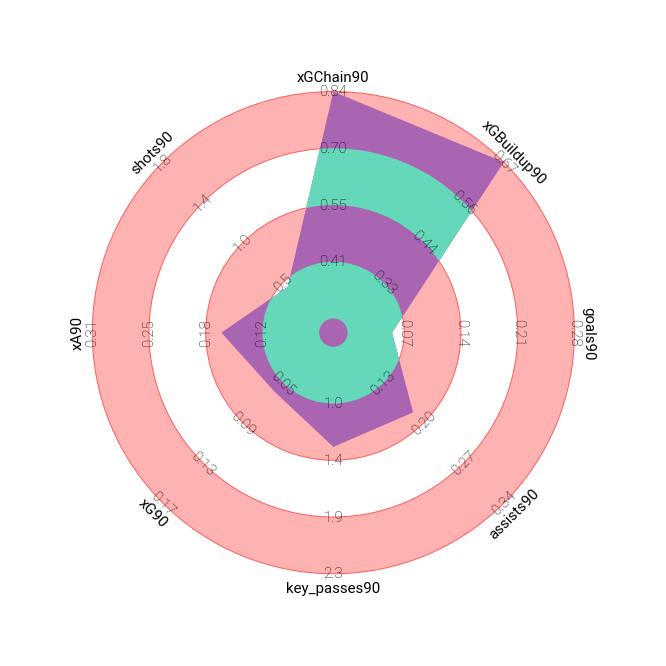

In [ ]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(Davies, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels



The chart shows that **Davies** is exceptionally good in building up his team's play, both his `xGChain90` and `xGBuildup90` are unbelievable. However, other important stats, which are directly related to goals like `key_passes90`, `assists90`, `xA90`, are not very impressing.

In contrast, **Trent Alexander-Arnold** is extremely high in these stats. Arnold has an amazing passing skill, which contributes to his high `xA90`.

#### Trent Alexander-Arnold (Liverpool FC)

<figure>
<img src="https://ronaldo.com/wp-content/uploads/2019/04/GettyImages-1144203614.jpg" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Arnold is also an excellent free-kick taker. Source: gettyimages</b></figcaption>
</figure>
<br/>


In [ ]:
Arnold_df = rank_wingbacks.loc[rank_wingbacks['player']=='Trent Alexander-Arnold'][['xGChain90', 'xGBuildup90', 'goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90']]
Arnold = Arnold_df.values.tolist()[0]
Arnold

[0.607, 0.426, 0.077, 0.324, 2.197, 0.064, 0.287, 1.257]

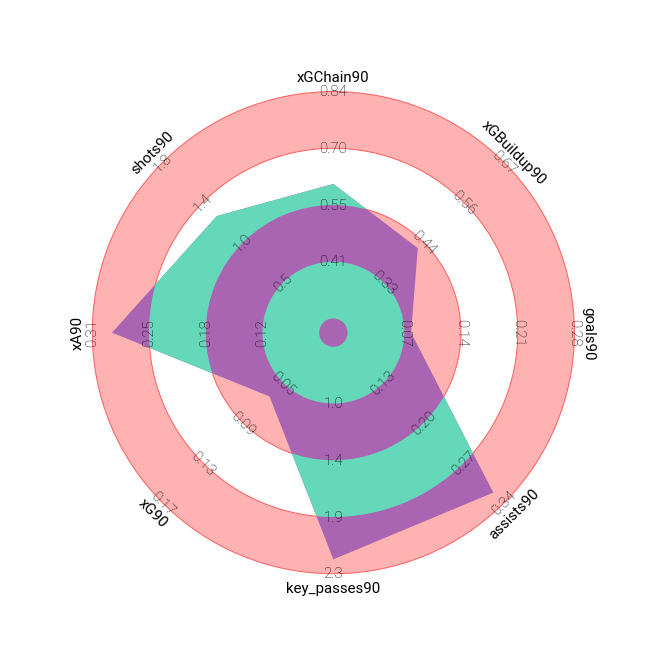

In [ ]:
fig, ax = radar.setup_axis() 
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(Arnold, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'}) 
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)

From the rank rable, it is quite surprising to me that **Raphael Guerreiro** has a really good well-rounded stats. 

#### Raphael Guerreiro (Borussia Dortmund)

<figure>
<img src="https://media.minutemediacdn.com/process?url=https%3A%2F%2F90min-images-original.s3.amazonaws.com%2Fproduction%2Fborussia-moenchengladbach-v-borussia-dortmund-bundesliga-5d7a41adcccf229345000001.jpg&filters%5Bcrop%5D%5Bw%5D=0.8649237472766883&filters%5Bcrop%5D%5Bh%5D=1.0&filters%5Bcrop%5D%5Bo_x%5D=0.05004201680672268&filters%5Bcrop%5D%5Bo_y%5D=0.0&filters%5Bquality%5D%5Btarget%5D=80&type=.jpg&filters%5Bresize%5D%5Bw%5D=630&filters%5Bresize%5D%5Bh%5D=472" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Raphael Guerreiro. Source: 90min.com</b></figcaption>
</figure>
<br/>

In [ ]:
Rafael_df = rank_wingbacks.loc[rank_wingbacks['player']=='Raphael Guerreiro'][['xGChain90', 'xGBuildup90', 'goals90', 'assists90', 'key_passes90', 'xG90', 'xA90', 'shots90']]
Rafael = Rafael_df.values.tolist()[0]
Rafael

[0.738, 0.548, 0.275, 0.21, 1.716, 0.173, 0.179, 1.44]

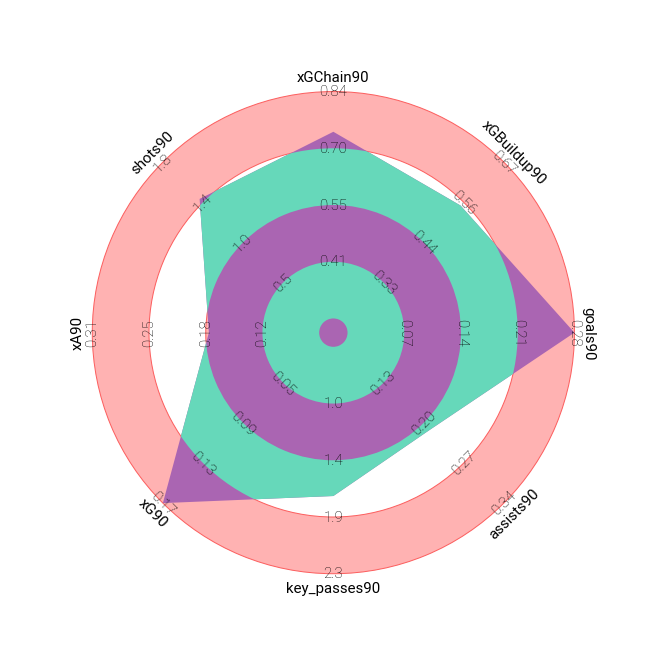

In [ ]:
fig, ax = radar.setup_axis() 
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(Rafael, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'}) 
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)

However, a little research shows that he is really amazing. He is considered to be Bundesliga's **Gareth Bale**, a famous winger used to start his career as a pacy left back. Current manager of Chelsea FC, **Thomas Tuchel** admitted that Rafael is "much too good to be limited to just one position".

Many wingbacks in top 20 in the rank table above have interesting stories behind. Because of the efficiency and prominency in attacking, it is not surprising that some day, some of them might change the role, as we already saw the case of **Kimmich**, who is now playing as a central midfielder at Bayern Munich. 

It is not the purpose of this project to give an overall outlook of wingbacks, instead it focuses only on their contribution to building up team's play. This reason also explains the gap of the market values between them, since we have not yet seen how good they are in defending, or other important factors like ages, injury histories...

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7ffa858-4e2e-42c3-bf6d-b07859d0ba27' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>